In [3]:
# Upgrade dependencies
! pip install -q pandas
! pip install -q scikit-learn
! pip install -q nltk
! pip install -q matplotlib
! pip install -q numpy
! pip install -q torch
! pip install -q boto3

In [2]:
# import the datasets
#import boto3
import os
from os import path
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np                    
import re, string
import nltk
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
import torch
from torch import nn

In [3]:
import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('./data/train.csv', sep=';')

In [4]:
# Print the first five rows
# NaN means missing data
df.head()

,id,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,6.4,0.13,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6
1,1,white,6.2,0.33,0.14,4.8,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,5
2,2,white,6.3,0.32,0.32,1.5,0.030,24.0,101.0,0.98923,3.21,0.42,13.0,5
3,3,white,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6
4,4,white,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.5,6


In [5]:
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (4547, 14)


In [6]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4547 non-null   int64  
 1   color                 4547 non-null   object 
 2   fixed acidity         4547 non-null   float64
 3   volatile acidity      4547 non-null   float64
 4   citric acid           4547 non-null   float64
 5   residual sugar        4547 non-null   float64
 6   chlorides             4547 non-null   float64
 7   free sulfur dioxide   4547 non-null   float64
 8   total sulfur dioxide  4547 non-null   float64
 9   density               4547 non-null   float64
 10  pH                    4547 non-null   float64
 11  sulphates             4547 non-null   float64
 12  alcohol               4547 non-null   float64
 13  quality               4547 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 497.5+ KB


In [7]:
# This prints basic statistics for numerical columns
df.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,2273.000000,7.218628,0.340790,0.316796,5.376490,0.056391,30.399824,115.451177,0.994682,3.218865,0.530550,10.494042,5.810864
std,1312.750167,1.307541,0.165061,0.145354,4.656574,0.035808,17.846286,56.651854,0.002930,0.161170,0.150886,1.193348,0.868795
min,0.000000,3.900000,0.080000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,1136.500000,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,9.500000,5.000000
50%,2273.000000,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994900,3.210000,0.500000,10.300000,6.000000
75%,3409.500000,7.700000,0.402500,0.390000,8.000000,0.066000,41.000000,155.000000,0.996920,3.320000,0.600000,11.300000,6.000000
max,4546.000000,15.900000,1.580000,1.230000,31.600000,0.611000,289.000000,440.000000,1.010300,4.010000,2.000000,14.900000,9.000000


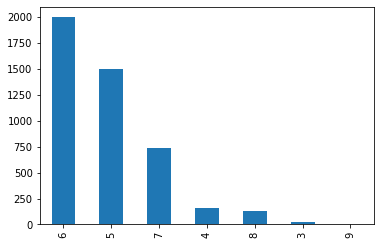

In [8]:
df['quality'].value_counts().plot.bar()
plt.show()

In [9]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

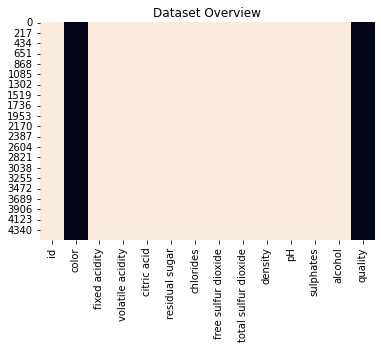

 Categerocial   Numeric   NaN 


In [38]:
import seaborn as sns

dtf = df
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=10) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[0;37;40m Categerocial ", "\033[1;30;43m Numeric ", "\033[1;30;47m NaN ")

In [99]:
dtf = dtf.set_index("id")

In [100]:
dtf.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
id,,,,,,,,,,,,,
0,white,6.4,0.13,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6
1,white,6.2,0.33,0.14,4.8,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,5
2,white,6.3,0.32,0.32,1.5,0.030,24.0,101.0,0.98923,3.21,0.42,13.0,5
3,white,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6
4,white,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.5,6


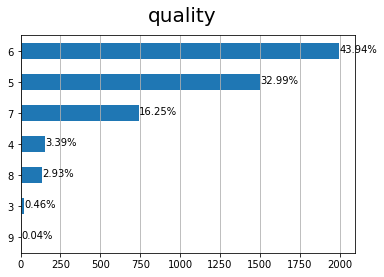

In [101]:
y = "quality"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [102]:
## for data
import pandas as pd
import numpy as np## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition## for explainer
#from lime import lime_tabular

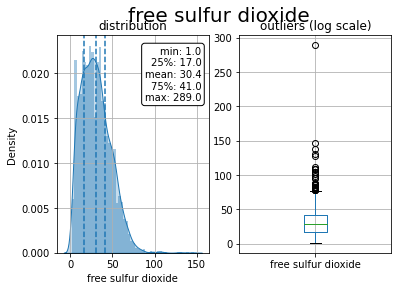

In [103]:
x = "free sulfur dioxide"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = (tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

Text(0.5, 1.0, 'free sulfur dioxide bins')

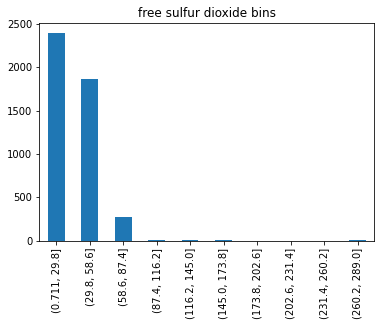

In [104]:
ax = dtf["free sulfur dioxide"].value_counts(bins=10, sort=False).plot(kind="bar")
plt.title("free sulfur dioxide bins")

In [105]:
dropIndexes = dtf[dtf["free sulfur dioxide"] > 83.5].index
dtf.drop(dropIndexes , inplace=True)

Text(0.5, 1.0, 'free sulfur dioxide bins after outlier removal')

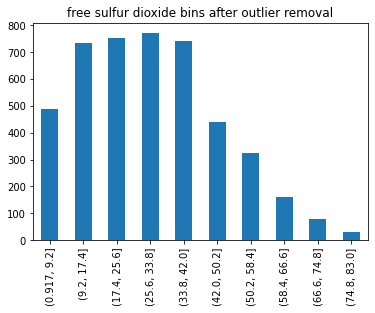

In [106]:
ax = dtf["free sulfur dioxide"].value_counts(bins=10, sort=False).plot(kind="bar")
plt.title("free sulfur dioxide bins after outlier removal")

Text(0.5, 1.0, 'free sulfur dioxide bins')

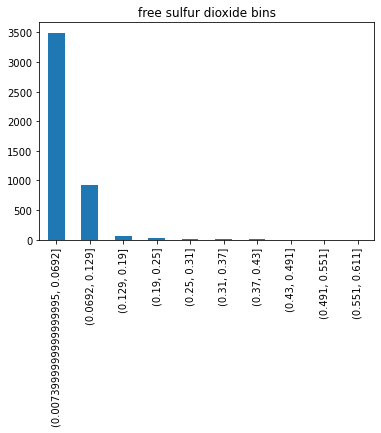

In [107]:
ax = dtf["chlorides"].value_counts(bins=10, sort=False).plot(kind="bar")
plt.title("free sulfur dioxide bins")

Text(0.5, 1.0, 'free sulfur dioxide bins')

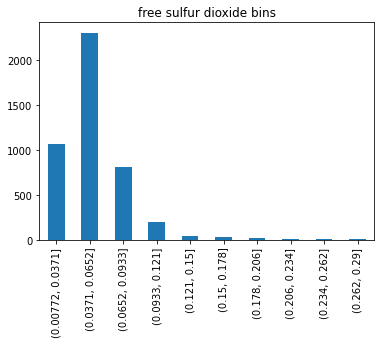

In [108]:
dropIndexes = dtf[dtf["chlorides"] > 0.31].index
dtf.drop(dropIndexes , inplace=True)
ax = dtf["chlorides"].value_counts(bins=10, sort=False).plot(kind="bar")
plt.title("free sulfur dioxide bins")

In [109]:
## split data
#dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)
dtf_train = dtf
    ## print info
print("X_train shape:", dtf_train.drop("quality",axis=1).shape, "| X_test shape:", dtf_test.drop("quality",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["quality"]),10), "| y_test mean:", round(np.mean(dtf_test["quality"]),10))
print(dtf_train.shape[1], "features:", dtf_train.drop("quality",axis=1).columns.to_list())

KeyError: "['quality'] not found in axis"

In [110]:
## create dummy
dummy = pd.get_dummies(dtf_train["color"], 
                       prefix="color",drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
print( dtf_train.filter(like="color", axis=1).head() )

    color  color_white
id                    
0   white            1
1   white            1
2   white            1
3   white            1
4   white            1


In [111]:
## drop the original categorical column
dtf_train = dtf_train.drop("color", axis=1)

In [112]:
dtf_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_white
id,,,,,,,,,,,,,
0,6.4,0.13,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6,1
1,6.2,0.33,0.14,4.8,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,5,1
2,6.3,0.32,0.32,1.5,0.030,24.0,101.0,0.98923,3.21,0.42,13.0,5,1
3,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6,1
4,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.5,6,1


In [113]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(dtf_train.drop("quality", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("quality", axis=1).columns, index=dtf_train.index)
dtf_scaled["quality"] = dtf_train["quality"]
dtf_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_white,quality
id,,,,,,,,,,,,,
0,0.208333,0.033333,0.382114,0.029126,0.295374,0.475610,0.449704,0.245364,0.379845,0.074286,0.260870,1.0,6
1,0.191667,0.166667,0.113821,0.132686,0.153025,0.317073,0.360947,0.329452,0.379845,0.142857,0.202899,1.0,5
2,0.200000,0.160000,0.260163,0.025890,0.074733,0.280488,0.281065,0.091419,0.379845,0.108571,0.724638,1.0,5
3,0.225000,0.053333,0.276423,0.012945,0.099644,0.487805,0.322485,0.120310,0.224806,0.257143,0.579710,1.0,6
4,0.200000,0.120000,0.341463,0.207120,0.128114,0.743902,0.600592,0.359207,0.372093,0.171429,0.217391,1.0,6


Text(0.5, 1.0, 'pearson correlation')

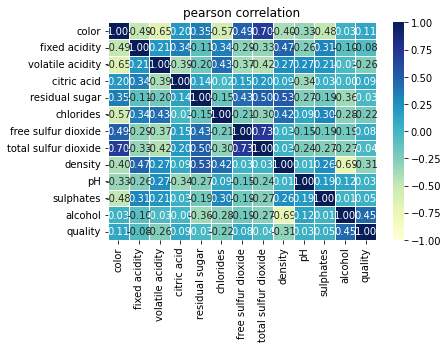

In [114]:
corr_matrix = dtf.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

<AxesSubplot:xlabel='selection', ylabel='features'>

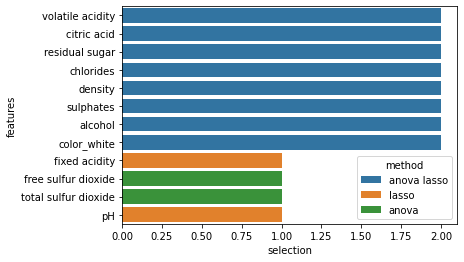

In [115]:
X = dtf_train.drop("quality", axis=1).values
y = dtf_train["quality"].values
feature_names = dtf_train.drop("quality", axis=1).columns## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=10).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=10).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

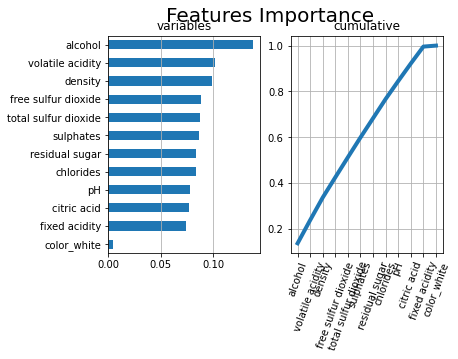

In [116]:
X = dtf_train.drop("quality", axis=1).values
y = dtf_train["quality"].values
feature_names = dtf_train.drop("quality", axis=1).columns.tolist()## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [117]:
#X_names = ["alcohol", "density", "volatile acidity", "free sulfur dioxide", "sulphates", "chlorides", "residual sugar", "citric acid", "fixed acidity", "pH"]
dtf_train, dtf_test = model_selection.train_test_split(dtf_scaled, 
                      test_size=0.3)
X_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "color_white"]

X_train = dtf_train[X_names].values
y_train = dtf_train["quality"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["quality"].values

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=300, criterion="entropy", bootstrap=True, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=-1,
                       random_state=0)

In [119]:
import _pickle as cPickle
# save the classifier
with open('my_dumped_classifier.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)    

# load it again
with open('my_dumped_classifier.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)

In [120]:
predicted = clf.predict(X_test)

In [121]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
    

Accuracy (overall correct predictions): 0.65


In [122]:
df_test = pd.read_csv('./data/test_public.csv', sep=';')

In [123]:
df_test = df_test.set_index("id")

In [124]:
dummy_test = pd.get_dummies(df_test["color"], 
                       prefix="color",drop_first=True)
dtf_test= pd.concat([df_test, dummy_test], axis=1)
print( dtf_test.filter(like="color", axis=1).head() )

    color  color_white
id                    
0   white            1
1   white            1
2   white            1
3   white            1
4   white            1


In [125]:
dtf_test = dtf_test.drop("color", axis=1)

In [126]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_test = scaler.fit_transform(dtf_test)
dtf_test_scaled= pd.DataFrame(X_test, columns=dtf_test.columns, index=dtf_test.index)
dtf_test_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_white
id,,,,,,,,,,,,
0,0.178571,0.095238,0.443038,0.006494,0.093373,0.308943,0.407258,0.168111,0.490566,0.086022,0.483333,1.0
1,0.258929,0.104762,0.341772,0.425325,0.129518,0.357724,0.596774,0.470104,0.141509,0.150538,0.133333,1.0
2,0.428571,0.190476,0.582278,0.077922,0.132530,0.308943,0.508065,0.380416,0.330189,0.333333,0.250000,1.0
3,0.241071,0.009524,0.379747,0.175325,0.054217,0.186992,0.512097,0.250433,0.188679,0.129032,0.483333,1.0
4,0.214286,0.180952,0.620253,0.012987,0.090361,0.276423,0.479839,0.120451,0.320755,0.225806,0.683333,1.0


In [127]:
X_test = dtf_test_scaled[X_names].values

In [128]:
predicted = clf.predict(X_test)
print(predicted)

[6 6 5 6 6 6 5 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 5 6 6 6 5 6 6 6 6 5 5 6 5 6 7
 5 5 6 7 5 5 6 6 7 6 6 6 6 5 6 6 6 6 6 5 6 6 6 6 5 7 5 5 6 5 7 6 6 6 6 6 6
 5 6 6 6 6 5 6 6 5 6 6 7 6 6 7 6 6 5 5 5 6 5 6 5 6 5 5 5 6 6 6 6 5 6 6 6 5
 5 6 6 5 6 6 6 5 5 6 7 6 6 6 5 6 6 5 6 6 6 5 6 6 5 6 6 6 6 7 6 6 5 6 6 5 5
 5 6 5 6 5 6 6 6 6 6 7 6 6 6 5 5 6 6 6 6 6 5 6 7 5 5 5 6 6 6 5 5 6 6 6 6 6
 6 5 5 6 5 6 6 6 5 6 6 6 5 6 6 6 6 6 5 6 6 5 6 6 7 6 6 6 5 5 6 5 6 6 5 5 6
 5 6 6 5 6 5 6 6 6 6 6 6 5 6 6 6 5 5 5 6 5 6 6 6 5 6 6 5 5 6 5 6 6 6 6 6 6
 5 6 5 7 6 5 6 5 7 5 6 5 5 6 6 6 5 7 5 5 5 6 6 5 5 5 6 6 5 5 5 6 6 6 6 6 7
 6 7 6 6 6 6 6 5 5 6 6 6 6 6 5 6 6 6 7 6 6 6 6 6 7 6 7 6 6 6 6 6 5 5 5 6 6
 6 7 6 6 6 6 5 7 6 6 7 6 6 6 6 6 5 5 5 6 6 5 5 6 6 6 5 6 6 6 6 5 5 5 7 6 6
 6 5 6 5 5 6 6 6 6 5 6 6 6 6 6 6 6 6 5 6 6 7 5 6 6 5 7 5 7 7 7 6 5 7 5 6 6
 5 6 6 5 6 5 5 5 6 6 6 6 6 6 6 5 5 7 6 5 6 5 6 6 6 5 6 6 5 6 6 6 6 6 6 5 6
 6 6 6 6 6 5 6 6 6 6 7 5 5 6 5 6 6 5 6 5 6 6 6 6 5 6 5 6 5 6 6 7 6 6 6 6 6
 7 7 6 6 6 5 6 6 6 6 6 6 

In [129]:
labels = []
for id, prediction in enumerate(predicted):
    labels.append([id, prediction])

In [130]:
import csv
fields = ['id', 'quality'] 
with open('./results.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(labels)

In [35]:
## call model
model = ensemble.GradientBoostingClassifier()## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=1000, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

KeyboardInterrupt: 

In [39]:
# use this for datasets with more columns, to print all columns
# (beware, if might raise memory errors when trying to print the text features values!)
# np.set_printoptions(threshold=np.inf) 

# This prints the column labels of the dataframe
print('All dataset columns:')
print(df.columns.values)

# This prints the column labels of the features identified as numerical
print('Numerical columns:')
print(df.select_dtypes(include=np.number).columns.values)

# This prints the column labels of the features identified as numerical
print('Categorical columns:')
print(df.select_dtypes(include='object').columns.values)

All dataset columns:
['id' 'color' 'fixed acidity' 'volatile acidity' 'citric acid'
 'residual sugar' 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide'
 'density' 'pH' 'sulphates' 'alcohol' 'quality']
Numerical columns:
['id' 'fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']
Categorical columns:
['color']


In [40]:
# Grab model features/inputs and target/output
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
 'sulphates', 'alcohol']

categorical_features = ['color']

text_features = []

model_features = numerical_features + categorical_features + text_features
model_target = 'quality'


In [41]:
for i in range(0,len(numerical_features)):
    print(df[numerical_features[i]].value_counts(bins=10, sort=False))

(3.887, 5.1]      63
(5.1, 6.3]       932
(6.3, 7.5]      2253
(7.5, 8.7]       837
(8.7, 9.9]       257
(9.9, 11.1]      112
(11.1, 12.3]      56
(12.3, 13.5]      25
(13.5, 14.7]       6
(14.7, 15.9]       6
Name: fixed acidity, dtype: int64
(0.0775, 0.23]    1106
(0.23, 0.38]      2165
(0.38, 0.53]       625
(0.53, 0.68]       430
(0.68, 0.83]       158
(0.83, 0.98]        45
(0.98, 1.13]        13
(1.13, 1.28]         2
(1.28, 1.43]         2
(1.43, 1.58]         1
Name: volatile acidity, dtype: int64
(-0.00223, 0.123]     432
(0.123, 0.246]        706
(0.246, 0.369]       2032
(0.369, 0.492]        996
(0.492, 0.615]        229
(0.615, 0.738]         96
(0.738, 0.861]         46
(0.861, 0.984]          3
(0.984, 1.107]          6
(1.107, 1.23]           1
Name: citric acid, dtype: int64
(0.668, 3.79]     2458
(3.79, 6.88]       679
(6.88, 9.97]       579
(9.97, 13.06]      407
(13.06, 16.15]     279
(16.15, 19.24]     115
(19.24, 22.33]      26
(22.33, 25.42]       1
(25.42, 28.51

In [42]:
#print(df[df[numerical_features[1]] > 3000000])
dropIndexes = df[df[numerical_features[5]] > 145].index
df.drop(dropIndexes , inplace=True)

In [43]:
df[numerical_features[6]].value_counts(bins=10, sort=False)

(5.661, 39.8]      613
(39.8, 73.6]       476
(73.6, 107.4]      819
(107.4, 141.2]    1110
(141.2, 175.0]     827
(175.0, 208.8]     491
(208.8, 242.6]     177
(242.6, 276.4]      26
(276.4, 310.2]       4
(310.2, 344.0]       2
Name: total sulfur dioxide, dtype: int64

In [44]:
print(df[numerical_features].isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [45]:
for c in categorical_features:
    print(c)
    print(df[c].unique()) #value_counts())

color
['white' 'red']


In [58]:
# Train-Validation split
train_data, val_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=23)

# Print the shapes of the Train - Test Datasets
print('Train - Validation - Test Datasets shapes: ', train_data.shape, val_data.shape)


Train - Validation - Test Datasets shapes:  (4090, 14) (455, 14)


In [59]:
print(train_data.shape, val_data.shape)

print(sum(train_data[model_target] == 0))
print(sum(train_data[model_target] == 1))
print(sum(train_data[model_target] == 2))
print(sum(train_data[model_target] == 3))
print(sum(train_data[model_target] == 4))
print(sum(train_data[model_target] == 5))
print(sum(train_data[model_target] == 6))
print(sum(train_data[model_target] == 7))
print(sum(train_data[model_target] == 8))
print(sum(train_data[model_target] == 9))
print(sum(train_data[model_target] == 10))

(4090, 14) (455, 14)
0
0
0
16
144
1361
1798
654
115
2
0


In [60]:
q3 = train_data[train_data[model_target] == 3]
q4 = train_data[train_data[model_target] == 4]
q5 = train_data[train_data[model_target] == 5]
q6 = train_data[train_data[model_target] == 6]
q7 = train_data[train_data[model_target] == 7]
q8 = train_data[train_data[model_target] == 8]
q9 = train_data[train_data[model_target] == 9]

train_data = pd.concat([q3, q4, q5, q6, q7, q8, q9])
train_data = shuffle(train_data)

In [61]:
print(train_data.shape, val_data.shape)

print(sum(train_data[model_target] == 0))
print(sum(train_data[model_target] == 1))
print(sum(train_data[model_target] == 2))
print(sum(train_data[model_target] == 3))
print(sum(train_data[model_target] == 4))
print(sum(train_data[model_target] == 5))
print(sum(train_data[model_target] == 6))
print(sum(train_data[model_target] == 7))
print(sum(train_data[model_target] == 8))
print(sum(train_data[model_target] == 9))
print(sum(train_data[model_target] == 10))

(4090, 14) (455, 14)
0
0
0
16
144
1361
1798
654
115
2
0


In [62]:
### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
                                ])

# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed
data_processor = ColumnTransformer([
    ('numerical_processing', numerical_processor, numerical_features),
    ('categorical_processing', categorical_processor, categorical_features),
                                    ]) 

# Visualize the data processing pipeline
from sklearn import set_config
set_config(display='diagram')
data_processor

### DATA PROCESSING ###
#######################

# Get train data to train the network
X_train = train_data[model_features]
y_train = train_data[model_target].values

# Get validation data to validate the network 
X_val = val_data[model_features]
y_val = val_data[model_target].values

print('Datasets shapes before processing: ', X_train.shape, X_val.shape)

X_train = data_processor.fit_transform(X_train)
X_val = data_processor.transform(X_val)

print('Datasets shapes after processing: ', X_train.shape, X_val.shape)


Datasets shapes before processing:  (4090, 12) (455, 12)
Datasets shapes after processing:  (4090, 13) (455, 13)


In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10], 'gamma': [0.5, 2]}
#clf = make_pipeline(StandardScaler(), GridSearchCV(svm.SVC(), parameters))
clf = make_pipeline(StandardScaler(), svm.SVC(C=1.3, kernel="rbf", gamma=0.65))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1.3, gamma=0.65))])

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
scores = cross_val_score(clf, X_val, y_val, cv=5)
print(scores)

[0.56043956 0.50549451 0.53846154 0.47252747 0.43956044]


In [37]:
df_test = pd.read_csv('./data/test_public.csv', sep=';')

In [66]:
# Validation-Test split
X_r = train_test_split(df_test, test_size=1, shuffle=False, random_state=23)
X_r2 = df_test[model_features]
X_r3 = data_processor.transform(X_r2)

In [67]:
preds = np.round(clf.predict(X_r3).tolist())
labels = []
for id, prediction in enumerate(preds):
    labels.append([id, prediction])

In [68]:
print(labels)

[[0, 6], [1, 8], [2, 5], [3, 6], [4, 6], [5, 5], [6, 5], [7, 6], [8, 8], [9, 6], [10, 6], [11, 6], [12, 7], [13, 6], [14, 6], [15, 6], [16, 6], [17, 6], [18, 7], [19, 8], [20, 6], [21, 6], [22, 5], [23, 7], [24, 6], [25, 6], [26, 6], [27, 6], [28, 6], [29, 6], [30, 6], [31, 5], [32, 5], [33, 6], [34, 5], [35, 6], [36, 6], [37, 6], [38, 5], [39, 6], [40, 7], [41, 5], [42, 6], [43, 7], [44, 5], [45, 7], [46, 6], [47, 5], [48, 6], [49, 5], [50, 6], [51, 6], [52, 6], [53, 6], [54, 6], [55, 6], [56, 6], [57, 7], [58, 6], [59, 7], [60, 6], [61, 5], [62, 8], [63, 5], [64, 5], [65, 6], [66, 6], [67, 7], [68, 6], [69, 6], [70, 6], [71, 6], [72, 5], [73, 5], [74, 5], [75, 6], [76, 5], [77, 5], [78, 7], [79, 5], [80, 6], [81, 6], [82, 6], [83, 7], [84, 5], [85, 7], [86, 5], [87, 6], [88, 6], [89, 6], [90, 6], [91, 5], [92, 5], [93, 5], [94, 6], [95, 5], [96, 5], [97, 5], [98, 6], [99, 6], [100, 5], [101, 7], [102, 7], [103, 7], [104, 6], [105, 6], [106, 6], [107, 6], [108, 5], [109, 6], [110, 5],

In [69]:
import csv
fields = ['id', 'quality'] 
with open('./results.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(labels)